# Impact of Hurricane Helene on the French Broad River Water quality


In [179]:
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt

## Importing and Cleaning the Data from all 4 years

In [106]:
postHeleneData = pd.read_csv("waterdata.txt", sep="\t", comment="#", skiprows=47)

expected_columns = [
    "agency_cd", "site_no", "datetime", 
    "pH_max", "pH_max_cd", "pH_min", "pH_min_cd", "pH_median", "pH_median_cd",
    "DO_min", "DO_min_cd", "DO_max", "DO_max_cd", "DO_mean", "DO_mean_cd",
    "SpecificCond_max", "SpecificCond_max_cd", "SpecificCond_mean", "SpecificCond_mean_cd", 
    "SpecificCond_min", "SpecificCond_min_cd", "Turbidity_min", "Turbidity_min_cd", 
    "Turbidity_max", "Turbidity_max_cd", "Turbidity_mean", "Turbidity_mean_cd", 
    "Temp_max", "Temp_max_cd", "Temp_min", "Temp_min_cd", "Temp_mean", "Temp_mean_cd",
    "Discharge_mean", "Discharge_mean_cd", "GageHeight_mean", "GageHeight_mean_cd", 
    "Precipitation_total", "Precipitation_total_cd"
]
postHeleneData.columns = expected_columns[:len(postHeleneData.columns)]

postHeleneData['datetime'] = pd.to_datetime(postHeleneData['datetime'])

postHeleneData = postHeleneData.loc[:, ~postHeleneData.columns.str.endswith('_cd')]

cleaned_2024 = "cleaned_waterdata.csv"
postHeleneData.to_csv(cleaned_post, index=False)

print("Data has been cleaned and saved to:", cleaned_2024)


Data has been cleaned and saved to: cleaned_waterdata.csv


In [12]:
print(postHeleneData.columns)

Index(['site_no', 'datetime', 'pH_max', 'pH_min', 'pH_median', 'DO_min',
       'DO_max', 'DO_mean', 'SpecificCond_max', 'SpecificCond_mean',
       'SpecificCond_min', 'Turbidity_min', 'Turbidity_max', 'Turbidity_mean',
       'Temp_max', 'Temp_min', 'Temp_mean', 'Discharge_mean',
       'GageHeight_mean', 'Precipitation_total'],
      dtype='object')


In [173]:
postHeleneData

,site_no,datetime,pH_max,pH_min,pH_median,DO_min,DO_max,DO_mean,SpecificCond_max,SpecificCond_mean,SpecificCond_min,Turbidity_min,Turbidity_max,Turbidity_mean,Temp_max,Temp_min,Temp_mean,Discharge_mean,GageHeight_mean,Precipitation_total
0,3451500,2024-10-01,6.7,6.6,6.6,6.7,7.3,7.0,35,33,31,26.6,51.2,37.5,19.0,18.3,18.6,9880,5.99,0.01
1,3451500,2024-10-02,6.8,6.7,6.7,7.3,7.6,7.4,41,38,35,23.5,39.0,30.9,19.3,18.3,18.7,6380,4.49,0.00
2,3451500,2024-10-03,6.9,6.8,6.9,7.6,8.1,7.9,44,43,41,23.1,36.1,28.7,19.5,18.2,18.7,4050,3.42,0.00
3,3451500,2024-10-04,7.0,6.9,6.9,8.1,8.2,8.2,44,44,43,21.1,29.2,25.0,19.1,18.0,18.5,3400,3.07,0.00
4,3451500,2024-10-05,7.0,6.9,7.0,8.1,8.3,8.2,46,44,43,17.7,27.8,23.7,19.9,18.0,18.9,3070,2.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,3451500,2024-11-27,7.6,7.2,7.4,10.7,11.6,11.0,50,49,49,3.2,4.7,3.8,9.5,8.1,9.0,1180,1.73,0.00
58,3451500,2024-11-28,7.5,7.2,7.3,10.4,11.2,10.7,53,50,49,4.0,5.2,4.6,10.2,9.0,9.5,1180,1.73,0.11
59,3451500,2024-11-29,7.6,7.2,7.4,10.7,11.7,11.1,51,49,48,3.1,4.9,3.8,9.0,7.1,8.2,1170,1.73,0.00
60,3451500,2024-11-30,7.6,7.2,7.4,11.2,12.4,11.8,49,48,47,3.0,4.1,3.3,7.1,5.5,6.1,1120,1.69,0.00


In [27]:
postHeleneData.datetime

0    2024-10-01
1    2024-10-02
2    2024-10-03
3    2024-10-04
4    2024-10-05
        ...    
57   2024-11-27
58   2024-11-28
59   2024-11-29
60   2024-11-30
61   2024-12-01
Name: datetime, Length: 62, dtype: datetime64[ns]

In [105]:
waterData2023 = pd.read_csv("2023waterdata.txt", sep="\t", comment="#", skiprows=45)

expected_columns = [
    "agency_cd", "site_no", "datetime", 
    "pH_max", "pH_max_cd", "pH_min", "pH_min_cd", "pH_median", "pH_median_cd",
    "DO_min", "DO_min_cd", "DO_max", "DO_max_cd", "DO_mean", "DO_mean_cd",
    "SpecificCond_max", "SpecificCond_max_cd", "SpecificCond_mean", "SpecificCond_mean_cd", 
    "SpecificCond_min", "SpecificCond_min_cd", "Turbidity_min", "Turbidity_min_cd", 
    "Turbidity_max", "Turbidity_max_cd", "Turbidity_mean", "Turbidity_mean_cd", 
    "Temp_max", "Temp_max_cd", "Temp_min", "Temp_min_cd", "Temp_mean", "Temp_mean_cd",
    "Discharge_mean", "Discharge_mean_cd", "GageHeight_mean", "GageHeight_mean_cd", 
    "Precipitation_total", "Precipitation_total_cd"
]
waterData2023.columns = expected_columns[:len(waterData2023.columns)]

waterData2023['datetime'] = pd.to_datetime(waterData2023['datetime'])

waterData2023 = waterData2023.loc[:, ~waterData2023.columns.str.endswith('_cd')]

cleaned_2023 = "cleaned_waterdata2023.csv"
waterData2023.to_csv(cleaned_2023, index=False)

print("Data has been cleaned and saved to:", cleaned_2023)

Data has been cleaned and saved to: cleaned_waterdata2023.csv


In [103]:
waterData2022 = pd.read_csv("2022waterdata.txt", sep="\t", comment="#", skiprows=47)

expected_columns = [
    "agency_cd", "site_no", "datetime", 
    "pH_max", "pH_max_cd", "pH_min", "pH_min_cd", "pH_median", "pH_median_cd",
    "DO_min", "DO_min_cd", "DO_max", "DO_max_cd", "DO_mean", "DO_mean_cd",
    "SpecificCond_max", "SpecificCond_max_cd", "SpecificCond_mean", "SpecificCond_mean_cd", 
    "SpecificCond_min", "SpecificCond_min_cd", "Turbidity_min", "Turbidity_min_cd", 
    "Turbidity_max", "Turbidity_max_cd", "Turbidity_mean", "Turbidity_mean_cd", 
    "Temp_max", "Temp_max_cd", "Temp_min", "Temp_min_cd", "Temp_mean", "Temp_mean_cd",
    "Discharge_mean", "Discharge_mean_cd", "GageHeight_mean", "GageHeight_mean_cd", 
    "Precipitation_total", "Precipitation_total_cd"
]
waterData2022.columns = expected_columns[:len(waterData2022.columns)]

# Convert the datetime column to datetime format
waterData2022['datetime'] = pd.to_datetime(waterData2022['datetime'])

# Drop qualifier columns (e.g., "_cd")
waterData2022 = waterData2022.loc[:, ~waterData2022.columns.str.endswith('_cd')]

# Save the cleaned data to a new CSV file
cleaned_2022 = "cleaned_waterdata2022.csv"
waterData2022.to_csv(cleaned_2022, index=False)

print("Data has been cleaned and saved to:", cleaned_2022)

Data has been cleaned and saved to: cleaned_waterdata2022.csv


In [102]:
waterData2021 = pd.read_csv("2021waterdata.txt", sep="\t", comment="#", skiprows=47)

expected_columns = [
    "agency_cd", "site_no", "datetime", 
    "pH_max", "pH_max_cd", "pH_min", "pH_min_cd", "pH_median", "pH_median_cd",
    "DO_min", "DO_min_cd", "DO_max", "DO_max_cd", "DO_mean", "DO_mean_cd",
    "SpecificCond_max", "SpecificCond_max_cd", "SpecificCond_mean", "SpecificCond_mean_cd", 
    "SpecificCond_min", "SpecificCond_min_cd", "Turbidity_min", "Turbidity_min_cd", 
    "Turbidity_max", "Turbidity_max_cd", "Turbidity_mean", "Turbidity_mean_cd", 
    "Temp_max", "Temp_max_cd", "Temp_min", "Temp_min_cd", "Temp_mean", "Temp_mean_cd",
    "Discharge_mean", "Discharge_mean_cd", "GageHeight_mean", "GageHeight_mean_cd", 
    "Precipitation_total", "Precipitation_total_cd"
]
waterData2021.columns = expected_columns[:len(waterData2021.columns)]

waterData2021['datetime'] = pd.to_datetime(waterData2021['datetime'])

waterData2021 = waterData2021.loc[:, ~waterData2021.columns.str.endswith('_cd')]

cleaned_2021 = "cleaned_waterdata2021.csv"
waterData2021.to_csv(cleaned_2021, index=False)

print("Data has been cleaned and saved to:", cleaned_2021)

Data has been cleaned and saved to: cleaned_waterdata2021.csv


In [107]:
data_2021=pd.read_csv('cleaned_waterdata2021.csv')
data_2022=pd.read_csv('cleaned_waterdata2022.csv')
data_2023=pd.read_csv('cleaned_waterdata2023.csv')
data_2024=pd.read_csv('cleaned_waterdata.csv')


In [88]:
data_2024

,site_no,datetime,pH_max,pH_min,pH_median,DO_min,DO_max,DO_mean,SpecificCond_max,SpecificCond_mean,SpecificCond_min,Turbidity_min,Turbidity_max,Turbidity_mean,Temp_max,Temp_min,Temp_mean,Discharge_mean,GageHeight_mean,Precipitation_total
0,3451500,2024-10-01,6.7,6.6,6.6,6.7,7.3,7.0,35,33,31,26.6,51.2,37.5,19.0,18.3,18.6,9880,5.99,0.01
1,3451500,2024-10-02,6.8,6.7,6.7,7.3,7.6,7.4,41,38,35,23.5,39.0,30.9,19.3,18.3,18.7,6380,4.49,0.00
2,3451500,2024-10-03,6.9,6.8,6.9,7.6,8.1,7.9,44,43,41,23.1,36.1,28.7,19.5,18.2,18.7,4050,3.42,0.00
3,3451500,2024-10-04,7.0,6.9,6.9,8.1,8.2,8.2,44,44,43,21.1,29.2,25.0,19.1,18.0,18.5,3400,3.07,0.00
4,3451500,2024-10-05,7.0,6.9,7.0,8.1,8.3,8.2,46,44,43,17.7,27.8,23.7,19.9,18.0,18.9,3070,2.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,3451500,2024-11-27,7.6,7.2,7.4,10.7,11.6,11.0,50,49,49,3.2,4.7,3.8,9.5,8.1,9.0,1180,1.73,0.00
58,3451500,2024-11-28,7.5,7.2,7.3,10.4,11.2,10.7,53,50,49,4.0,5.2,4.6,10.2,9.0,9.5,1180,1.73,0.11
59,3451500,2024-11-29,7.6,7.2,7.4,10.7,11.7,11.1,51,49,48,3.1,4.9,3.8,9.0,7.1,8.2,1170,1.73,0.00
60,3451500,2024-11-30,7.6,7.2,7.4,11.2,12.4,11.8,49,48,47,3.0,4.1,3.3,7.1,5.5,6.1,1120,1.69,0.00


# pH Levels Comparison

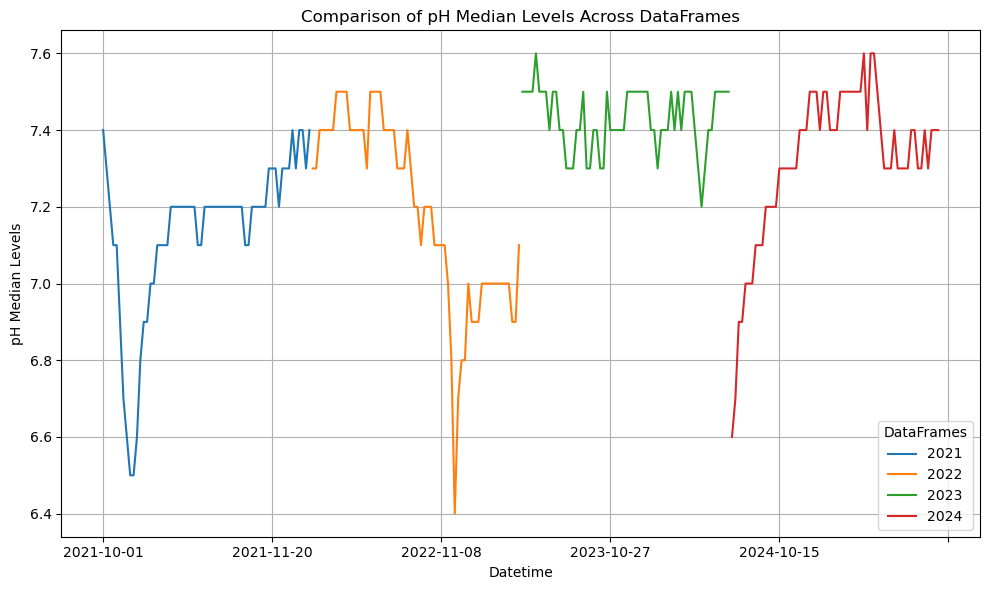

In [174]:
for df in [data_2021,data_2022,data_2023,data_2024]:
    df.set_index('datetime', inplace=True, drop=False)
    
pH_median_data=pd.concat([
    data_2021['pH_median'].rename('2021'),
    data_2022['pH_median'].rename('2022'),
    data_2023['pH_median'].rename('2023'),
    data_2024['pH_median'].rename('2024')
], axis=1)

fig, ax =plt.subplots(figsize=(10,6))

pH_median_data.plot(ax=ax)

ax.set_title("Comparison of pH Median Levels Across DataFrames")
ax.set_xlabel("Datetime")
ax.set_ylabel("pH Median Levels")
ax.legend(title="DataFrames")
ax.grid()

plt.tight_layout()
plt.show()

The pH Median for 2024 started out unusually low and acidic, which points to a pollution issue caused by Helene. However, the pH levels returned back to relatively normal levels just a few weeks after Helene.


# Dissolved Oxygen Levels Comparison

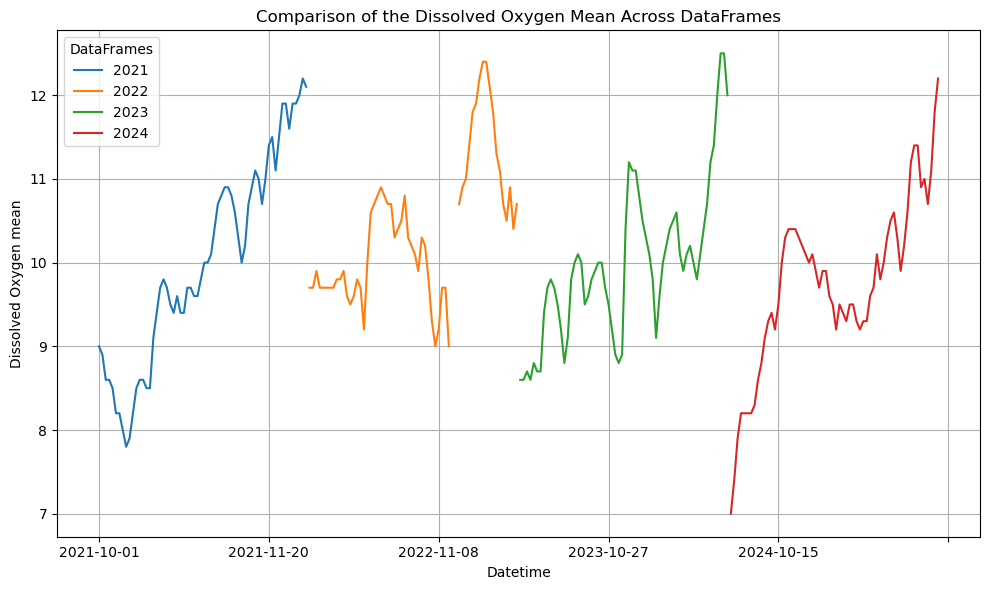

In [139]:
DO_mean_data=pd.concat([
    data_2021['DO_mean'].rename('2021'),
    data_2022['DO_mean'].rename('2022'),
    data_2023['DO_mean'].rename('2023'),
    data_2024['DO_mean'].rename('2024')
], axis=1)

fig, ax =plt.subplots(figsize=(10,6))

DO_mean_data.plot(ax=ax)

ax.set_title("Comparison of the Dissolved Oxygen Mean Across DataFrames")
ax.set_xlabel("Datetime")
ax.set_ylabel("Dissolved Oxygen mean")
ax.legend(title="DataFrames")
ax.grid()

plt.tight_layout()
plt.show()

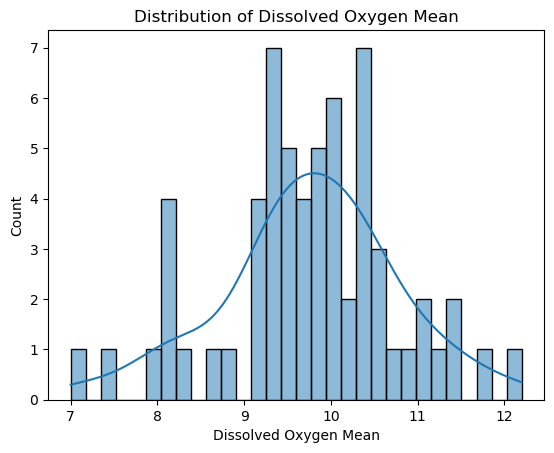

In [180]:
sns.histplot(data=data_2024,x='DO_mean',kde=True,bins=30)
plt.title("Distribution of Dissolved Oxygen Mean")
plt.xlabel("Dissolved Oxygen Mean")
plt.show()

After Helene, the French Broad had much lower DO levels than the previous years, leading to hypoxia. This causes major issues for the ecosystem and can lead to sensitive species’ dying off. The hypoxia was caused by high amounts of runoff and pollution left in the river, but the hypoxia only lasted a few weeks before levels returned to normal. 
However, the ecosystem being altered will leave a permanent mark on the river as now more tolerant species may be dominant.


# Gage Height and Discharge Level Comparisons

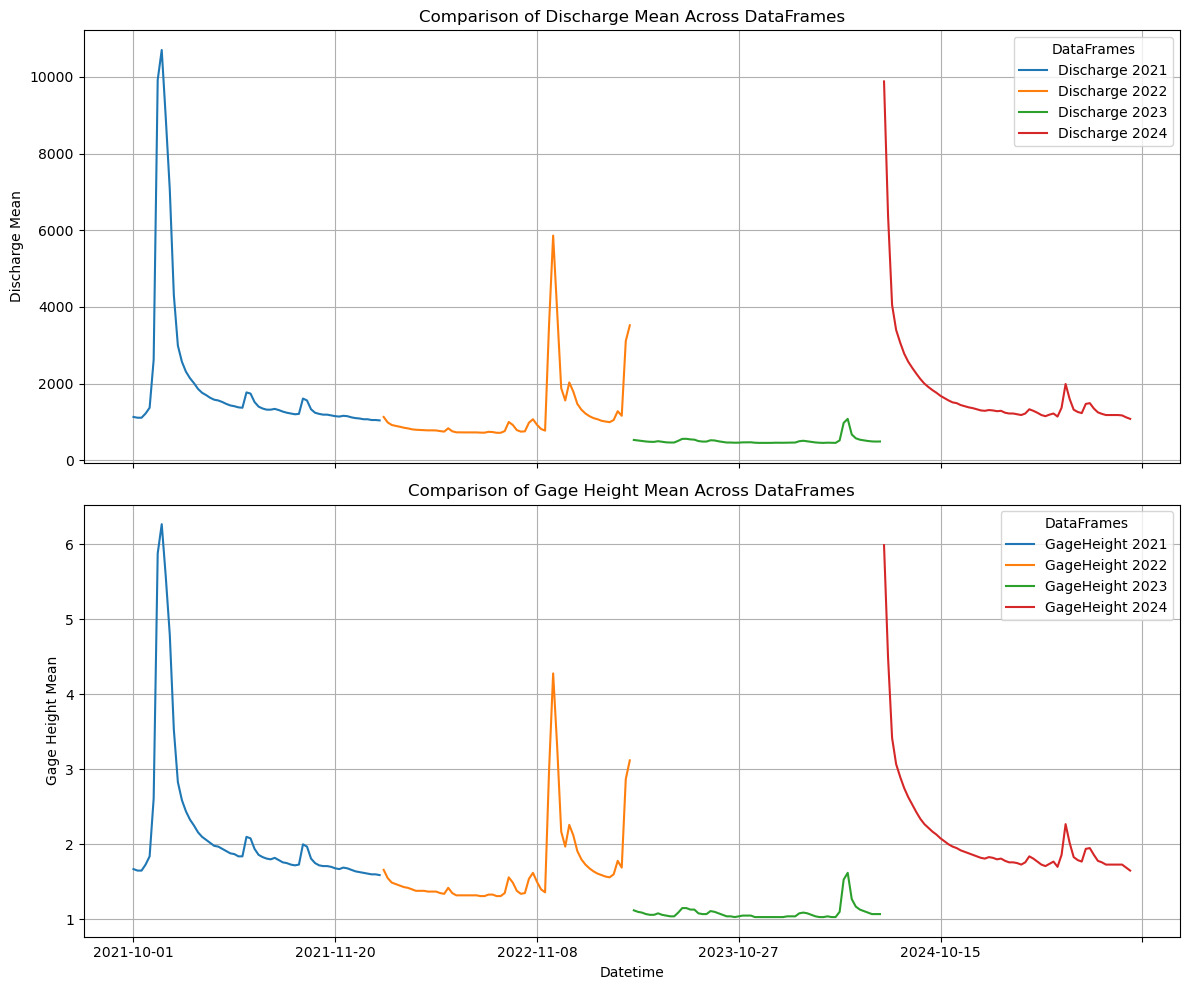

In [140]:
discharge_mean_data=pd.concat([
    data_2021['Discharge_mean'].rename('Discharge 2021'),
    data_2022['Discharge_mean'].rename('Discharge 2022'),
    data_2023['Discharge_mean'].rename('Discharge 2023'),
    data_2024['Discharge_mean'].rename('Discharge 2024'),
], axis=1)
gage_height_mean_data=pd.concat([
    data_2021['GageHeight_mean'].rename('GageHeight 2021'),
    data_2022['GageHeight_mean'].rename('GageHeight 2022'),
    data_2023['GageHeight_mean'].rename('GageHeight 2023'),
    data_2024['GageHeight_mean'].rename('GageHeight 2024')
], axis=1)

fig, axes =plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

discharge_mean_data.plot(ax=axes[0], title="Comparison of Discharge Mean Across DataFrames")
axes[0].set_ylabel("Discharge Mean")
axes[0].legend(title="DataFrames")
axes[0].grid()

gage_height_mean_data.plot(ax=axes[1], title="Comparison of Gage Height Mean Across DataFrames")
axes[1].set_ylabel("Gage Height Mean")
axes[1].set_xlabel("Datetime")
axes[1].legend(title="DataFrames")
axes[1].grid()

plt.tight_layout()
plt.show()


In [200]:
correlation_2024 = data_2024['Discharge_mean'].corr(data_2024['GageHeight_mean'])
print(f"Correlation between Discharge and Gage Height (2024): {correlation_2021}")

Correlation between Discharge and Gage Height (2024): 0.9968327054627288


The water height levels for the French Broad River returned to normal relatively quickly; displayed by the Gage Height and Discharge means. 
The Discharge and Gage Height Mean graphs look almost identical, because they are almost identical, with their correlation being 0.9968327054627288(a 1 would mean they’re the exact same).



# Temperature and Dissolved Oxygen Levels Correlation

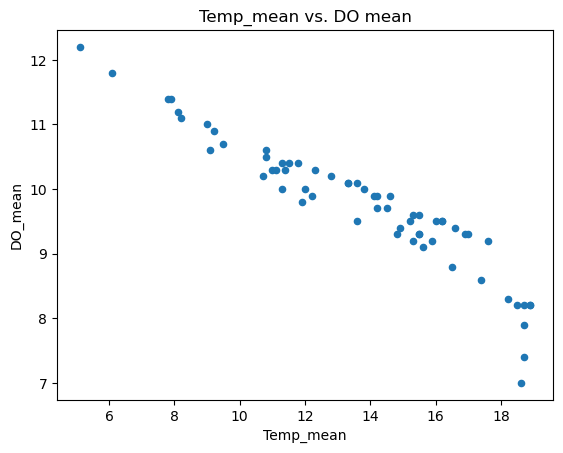

Correlation between DO mean and Temp_mean (2024): -0.9438703785656704


In [204]:
data_2024.plot(kind='scatter',
              x='Temp_mean',
              y='DO_mean',
              title='Temp_mean vs. DO mean')
plt.show()
DO_Temp_correlation_2024 = data_2024['DO_mean'].corr(data_2024['Temp_mean'])
print(f"Correlation between DO mean and Temp_mean (2024): {DO_Temp_correlation_2024}")

A strong negative correlation is regularly expected between Dissolved Oxygen and Temperature, suggesting the ecosystem has not shown a lasting effect from Helene.

# Correlation between pH, Turbidity, Dissolved Oxygen, and Temperature Levels

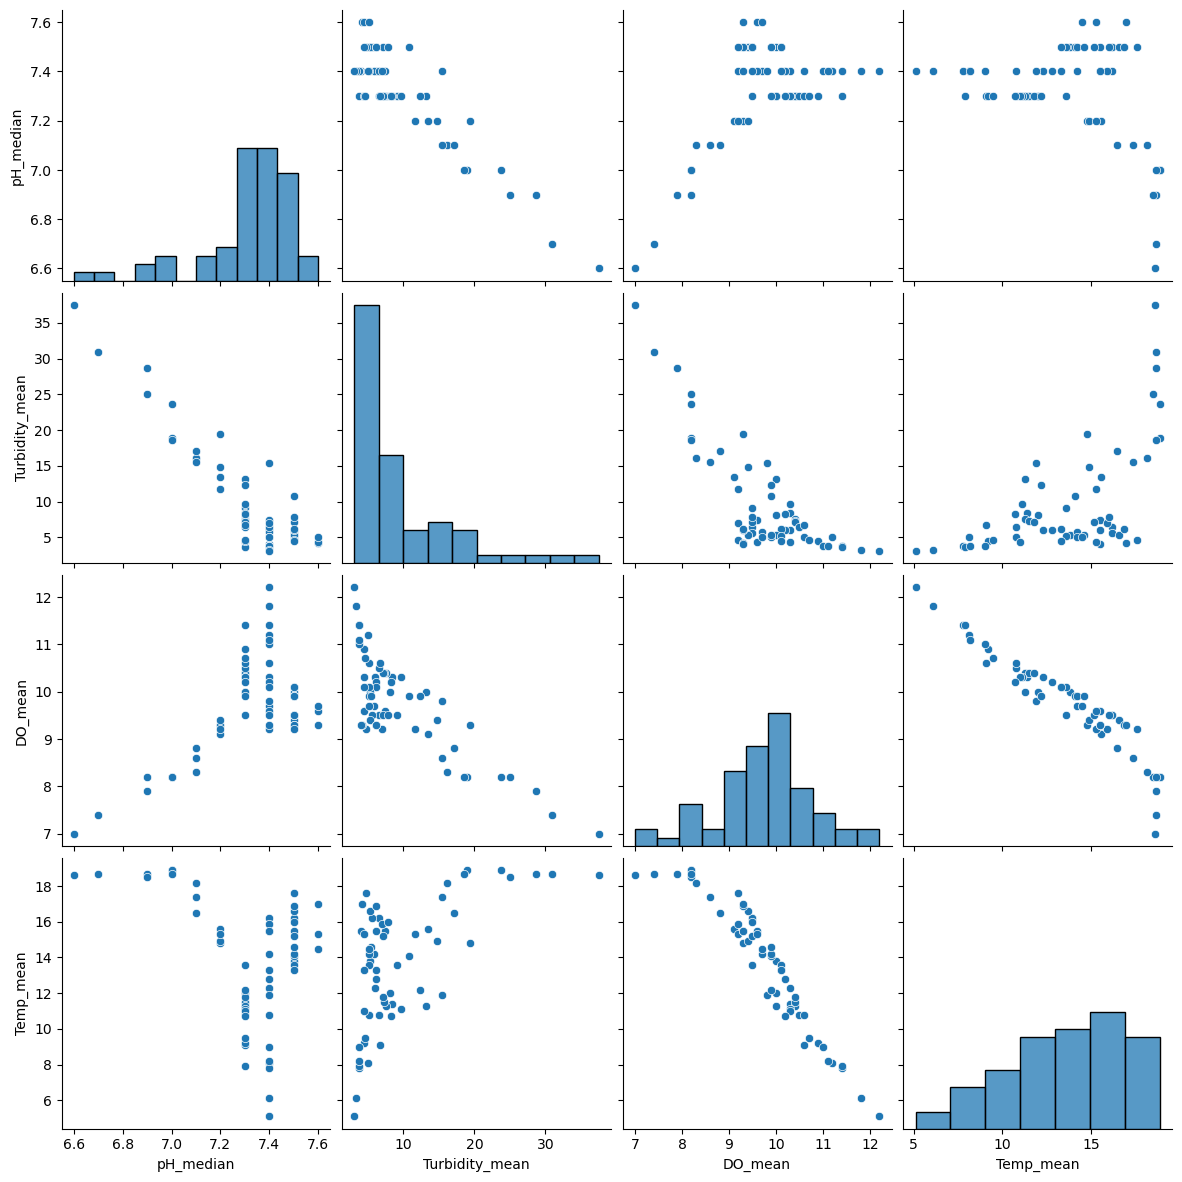

In [207]:
#Informational warning appears
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

sns.pairplot(data_2024,
            vars=['pH_median', 'Turbidity_mean','DO_mean','Temp_mean'],
             height=3
            )
plt.show()

In [195]:
corr_2024=data_2024[['pH_median','Turbidity_mean','DO_mean','Temp_mean']].corr()
corr_2024

,pH_median,Turbidity_mean,DO_mean,Temp_mean
pH_median,1.000000,-0.897129,0.610877,-0.365645
Turbidity_mean,-0.897129,1.000000,-0.792000,0.588692
DO_mean,0.610877,-0.792000,1.000000,-0.943870
Temp_mean,-0.365645,0.588692,-0.943870,1.000000


<Axes: >

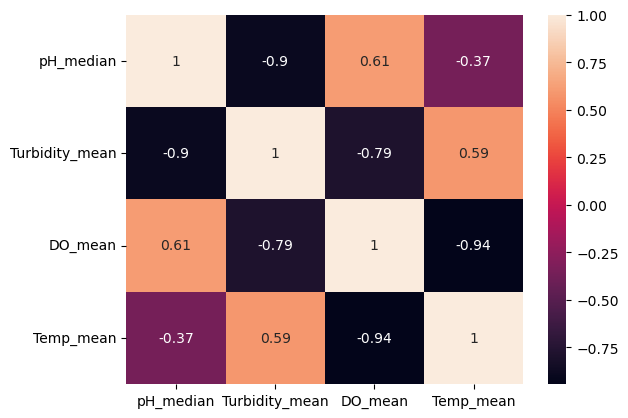

In [197]:
sns.heatmap(corr_2024, annot=True)